<a href="https://colab.research.google.com/github/syedsajidhussain/UPES-MCA_DL/blob/main/CNN%2BVGG_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 5s 0us/step


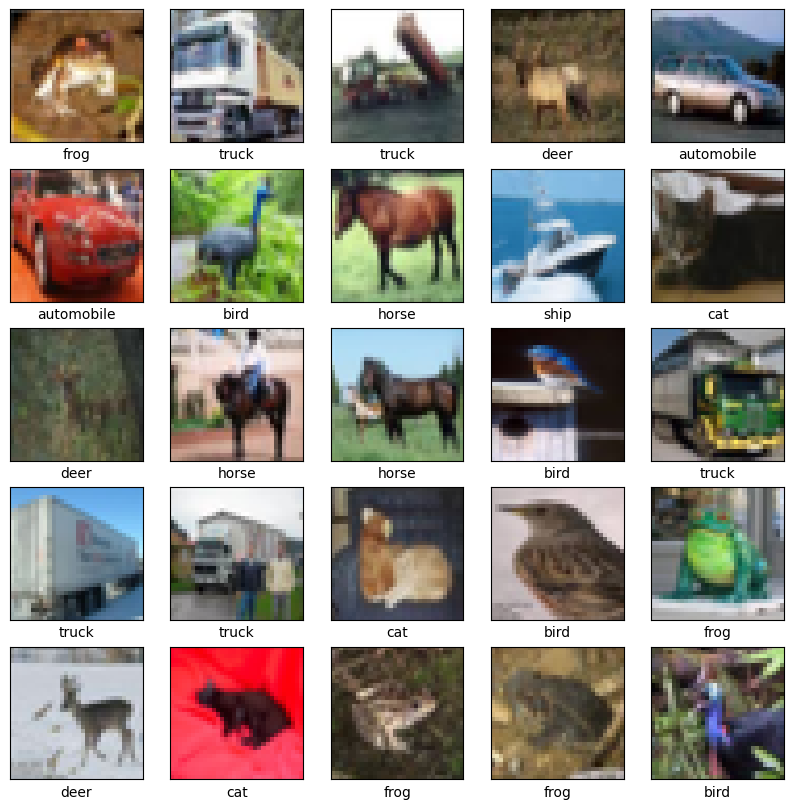

In [3]:
# Define class names (CIFAR-10 class names)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [4]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [5]:
# Print the output of the first convolutional layer
print("Output after Convolutional Layer 1:")
print(model.layers[0].output)

Output after Convolutional Layer 1:
KerasTensor(type_spec=TensorSpec(shape=(None, 30, 30, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


In [6]:
# Print the output of the first convolutional layer
print("Output after Convolutional Layer 1:")
print(model.layers[2].output)

Output after Convolutional Layer 1:
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 64), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5086 - accuracy: 0.4489 - val_loss: 1.2011 - val_accuracy: 0.5765
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1080 - accuracy: 0.6091 - val_loss: 1.0637 - val_accuracy: 0.6163
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9532 - accuracy: 0.6674 - val_loss: 0.9529 - val_accuracy: 0.6643
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8598 - accuracy: 0.6992 - val_loss: 0.9222 - val_accuracy: 0.6791
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7829 - accuracy: 0.7281 - val_loss: 0.9139 - val_accuracy: 0.6862
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7242 - accuracy: 0.7448 - val_loss: 0.8854 - val_accuracy: 0.6952
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6749 - accuracy: 0.7644 - val_loss: 0.8516 - val_accuracy

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.9291 - accuracy: 0.7053 - 655ms/epoch - 2ms/step
Test accuracy: 0.705299973487854


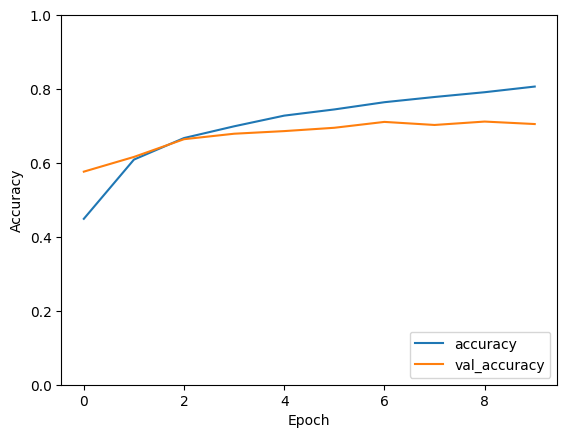

In [10]:

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()







In [12]:
import numpy as np

313/313 [==============================] - 1s 2ms/step


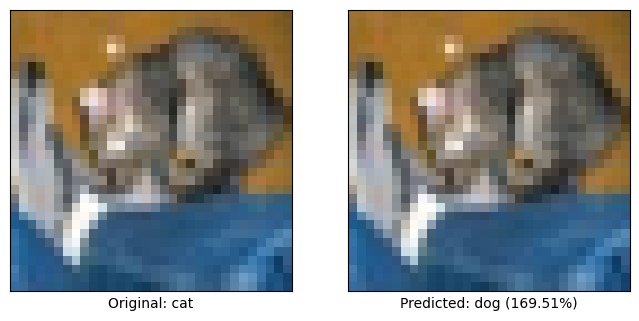

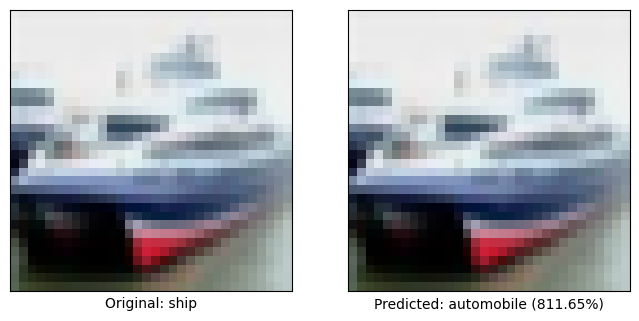

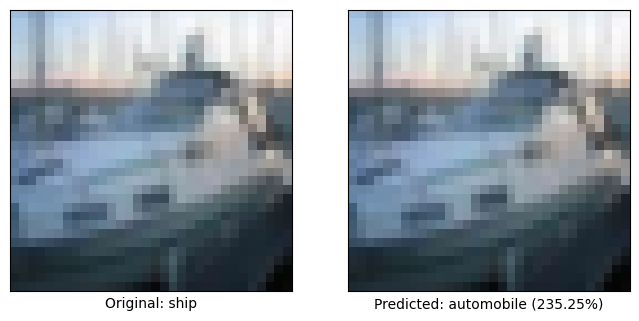

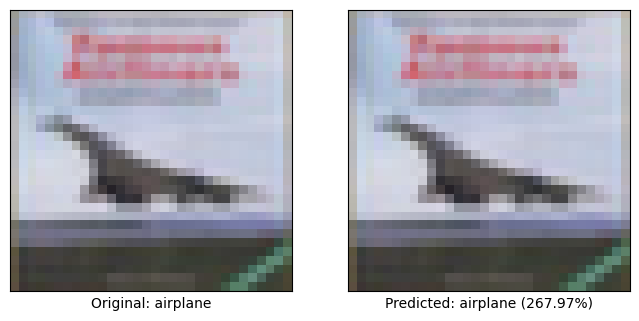

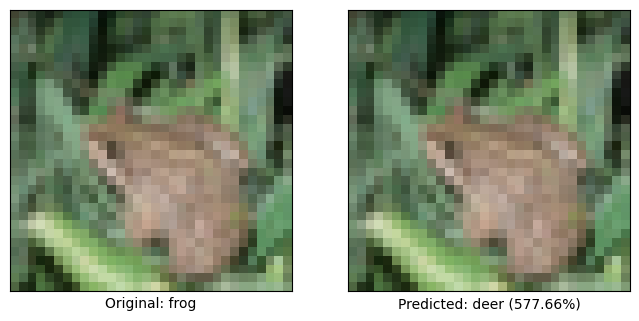

In [13]:
# Make predictions on the test data
predictions = model.predict(test_images)

# Show original and predicted results for a few test images
num_images_to_display = 5

for i in range(num_images_to_display):
    # Display the original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Original: {class_names[test_labels[i][0]]}')

    # Display the predicted result
    predicted_label = class_names[np.argmax(predictions[i])]
    confidence = 100 * np.max(predictions[i])
    plt.subplot(1, 2, 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {predicted_label} ({confidence:.2f}%)')

    plt.show()


**VGG-16**


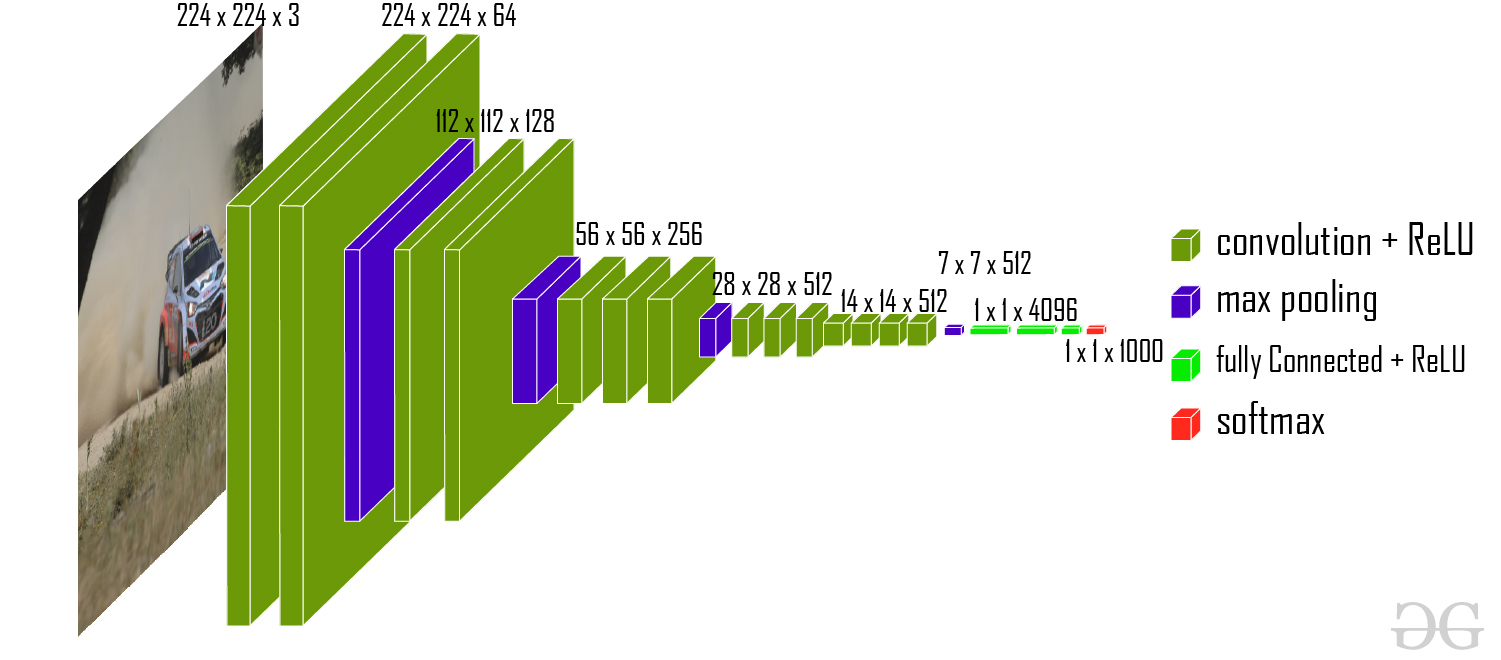



***VGG Architecture **: The input to the network is an image of dimensions (224, 224, 3). The first two layers have 64 channels of a 3*3 filter size and the same padding. Then after a max pool layer of stride (2, 2), two layers have convolution layers of 128 filter size and filter size (3, 3). This is followed by a max-pooling layer of stride (2, 2) which is the same as the previous layer. Then there are 2 convolution layers of filter size (3, 3) and 256 filters. After that, there are 2 sets of 3 convolution layers and a max pool layer. Each has 512 filters of (3, 3) size with the same padding. This image is then passed to the stack of two convolution layers. In these convolution and max-pooling layers, the filters we use are of the size 3/3 instead of 11/11 in AlexNet and 7/7 in ZF-Net. In some of the layers, it also uses 1*1 pixel which is used to manipulate the number of input channels. There is a padding of 1-pixel (same padding) done after each convolution layer to prevent the spatial feature of the image.*

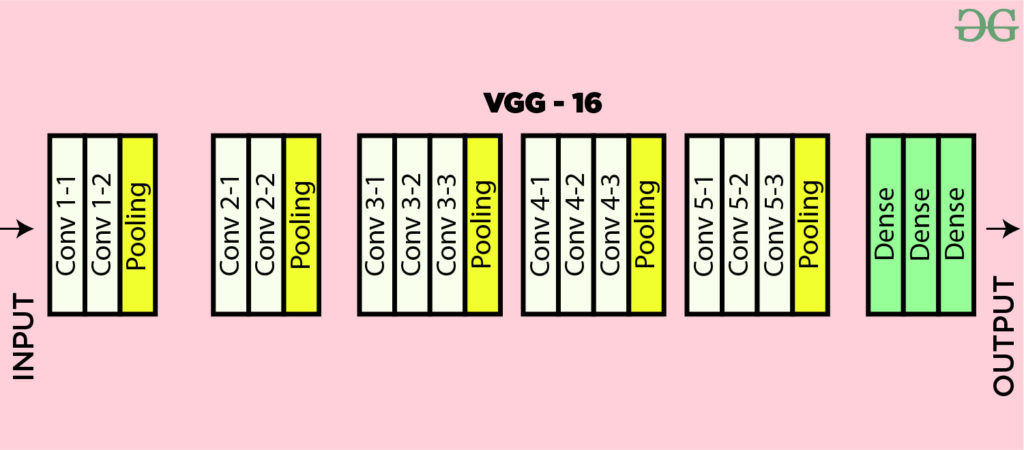

**Limitations Of VGG 16:**


*   It is very slow to train (the original VGG model was trained on Nvidia Titan GPU for 2-3 weeks).
*   The size of VGG-16 trained imageNet weights is 528 MB. So, it takes quite a lot of disk space and bandwidth which makes it inefficient.

138 million parameters lead to exploding gradients problem.






**Further advancements: Resnets are introduced to prevent exploding gradients problem that occurred in VGG-16**

**8 STEPS FOR IMPLEMENTING VGG16 IN KEARS**


1.Import the libraries for VGG16.

2.Create an object for training and testing data.

3.Initialize the model,

4.Pass the data to the dense layer.

5.Compile the model.

6.Import libraries to monitor and control training.

7.Visualize the training/validation data.

8.Test your model.

**Step1**

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="data",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

**Step2**
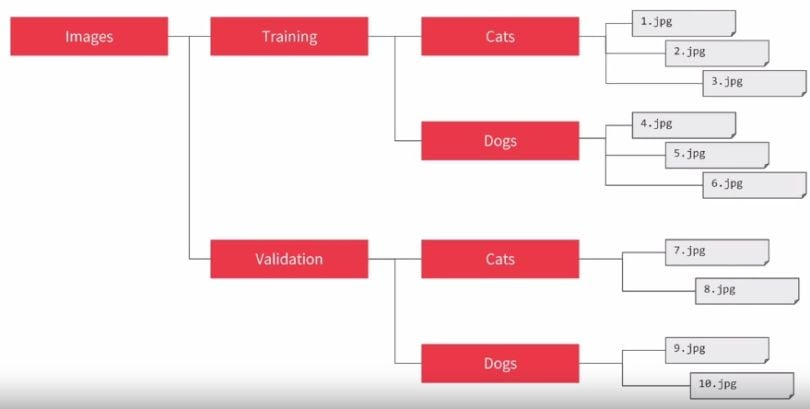


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

**STEP 3: INITIALIZE THE MODEL**




**STEP 4: PASS THE DATA TO THE DENSE LAYER**


After creating all the convolutions, we’ll pass the data to the dense layer. For that, we’ll flatten the vector that came out of the convolutions and add:


1 x Dense layer of 4096 units.

1 x Dense layer of 4096 units.

1 x Dense Softmax layer of two units.




In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

We’ll use the ReLU activation for both the dense layer of 4096 units to prevent forwarding negative values through the network. We’ll use a two-unit dense layer in the end with Softmax activation, as we have two classes to predict from in the end, which are dog and cat. The Softmax layer will output the value between 0 and 1 based on the confidence of the model depending on the class the images belong to.

After creating the Softmax layer, the model is finally prepared. Now, we need to compile the model.

**STEP 5: COMPILE THE MODEL**

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

**STEP 6: .Import libraries to monitor and control training.**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

**STEP 7: VISUALIZE THE TRAINING/VALIDATION DATA**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

**STEP 8: TEST YOUR MODEL**

In [ ]:
from keras.preprocessing import image
img = image.load_img("image.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

**END**

---

